In [2]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
data = iris.data
labels = iris.target
for i in [0, 79, 99, 101]:
  print(f"index: {i:3}, features: {data[i]}, label: {labels[i]}")

index:   0, features: [5.1 3.5 1.4 0.2], label: 0
index:  79, features: [5.7 2.6 3.5 1. ], label: 1
index:  99, features: [5.7 2.8 4.1 1.3], label: 1
index: 101, features: [5.8 2.7 5.1 1.9], label: 2


In [3]:
np.random.seed(42)
indices = np.random.permutation(len(data))
n_training_samples = 12
learn_data = data[indices[:-n_training_samples]]
learn_labels = labels[indices[:-n_training_samples]]
test_data = data[indices[-n_training_samples:]]
test_labels = labels[indices[-n_training_samples:]]
print("The first samples of our learn set:")
print(f"{'index':7s}{'data':20s}{'label':3s}")
for i in range(5):
  print(f"{i:4d} {learn_data[i]} {learn_labels[i]:3}")
print("The first samples of our test set:")
print(f"{'index':7s}{'data':20s}{'label':3s}")
for i in range(5):
  print(f"{i:4d} {learn_data[i]} {learn_labels[i]:3}")

The first samples of our learn set:
index  data                label
   0 [6.1 2.8 4.7 1.2]   1
   1 [5.7 3.8 1.7 0.3]   0
   2 [7.7 2.6 6.9 2.3]   2
   3 [6.  2.9 4.5 1.5]   1
   4 [6.8 2.8 4.8 1.4]   1
The first samples of our test set:
index  data                label
   0 [6.1 2.8 4.7 1.2]   1
   1 [5.7 3.8 1.7 0.3]   0
   2 [7.7 2.6 6.9 2.3]   2
   3 [6.  2.9 4.5 1.5]   1
   4 [6.8 2.8 4.8 1.4]   1


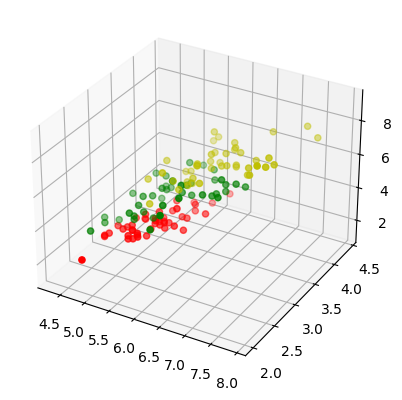

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
colours = ("r", "b")
X = []
for iclass in range(3):
  X.append([[], [], []])
  for i in range(len(learn_data)):
    if learn_labels[i] == iclass:
      X[iclass][0].append(learn_data[i][0])
      X[iclass][1].append(learn_data[i][1])
      X[iclass][2].append(sum(learn_data[i][2:]))
colours = ("r", "g", "y")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for iclass in range(3):
  ax.scatter(X[iclass][0], X[iclass][1], X[iclass][2], c=colours[iclass])
plt.show()

In [8]:
def distance(instance1, instance2):
  return np.linalg.norm(np.subtract(instance1, instance2))
print(distance([3, 5], [1, 1]))
print(distance(learn_data[3], learn_data[44]))

4.47213595499958
3.4190641994557516


In [9]:
def get_neighbors(training_set,labels,test_instance,k,distance):
  distances = []
  for index in range(len(training_set)):
    dist = distance(test_instance, training_set[index])
    distances.append((training_set[index], dist, labels[index]))
  distances.sort(key=lambda x: x[1])
  neighbors = distances[:k]
  return neighbors



In [10]:
for i in range(5):
  neighbors = get_neighbors(learn_data,learn_labels,test_data[i],3,distance=distance)
  print("Index: ",i,'\n',"Testset Data: ",test_data[i],'\n',"Testset Label: ",test_labels[i],'\n',"Neighbors: ",neighbors,'\n')

Index:  0 
 Testset Data:  [5.7 2.8 4.1 1.3] 
 Testset Label:  1 
 Neighbors:  [(array([5.7, 2.9, 4.2, 1.3]), 0.14142135623730995, 1), (array([5.6, 2.7, 4.2, 1.3]), 0.17320508075688815, 1), (array([5.6, 3. , 4.1, 1.3]), 0.22360679774997935, 1)] 

Index:  1 
 Testset Data:  [6.5 3.  5.5 1.8] 
 Testset Label:  2 
 Neighbors:  [(array([6.4, 3.1, 5.5, 1.8]), 0.1414213562373093, 2), (array([6.3, 2.9, 5.6, 1.8]), 0.24494897427831783, 2), (array([6.5, 3. , 5.2, 2. ]), 0.3605551275463988, 2)] 

Index:  2 
 Testset Data:  [6.3 2.3 4.4 1.3] 
 Testset Label:  1 
 Neighbors:  [(array([6.2, 2.2, 4.5, 1.5]), 0.26457513110645864, 1), (array([6.3, 2.5, 4.9, 1.5]), 0.574456264653803, 1), (array([6. , 2.2, 4. , 1. ]), 0.5916079783099617, 1)] 

Index:  3 
 Testset Data:  [6.4 2.9 4.3 1.3] 
 Testset Label:  1 
 Neighbors:  [(array([6.2, 2.9, 4.3, 1.3]), 0.20000000000000018, 1), (array([6.6, 3. , 4.4, 1.4]), 0.2645751311064587, 1), (array([6.6, 2.9, 4.6, 1.3]), 0.3605551275463984, 1)] 

Index:  4 
 Testset

In [11]:
from collections import Counter
def vote(neighbors):
  class_counter = Counter()
  for neighbor in neighbors:
    class_counter[neighbor[2]] += 1
  return class_counter.most_common(1)[0][0]

In [13]:
for i in range(n_training_samples):
  neighbors = get_neighbors(learn_data,learn_labels,test_data[i],3,distance=distance)
  print("index: ", i,
", result of vote: ", vote(neighbors),
", label: ", test_labels[i],
", data: ", test_data[i])

index:  0 , result of vote:  1 , label:  1 , data:  [5.7 2.8 4.1 1.3]
index:  1 , result of vote:  2 , label:  2 , data:  [6.5 3.  5.5 1.8]
index:  2 , result of vote:  1 , label:  1 , data:  [6.3 2.3 4.4 1.3]
index:  3 , result of vote:  1 , label:  1 , data:  [6.4 2.9 4.3 1.3]
index:  4 , result of vote:  2 , label:  2 , data:  [5.6 2.8 4.9 2. ]
index:  5 , result of vote:  2 , label:  2 , data:  [5.9 3.  5.1 1.8]
index:  6 , result of vote:  0 , label:  0 , data:  [5.4 3.4 1.7 0.2]
index:  7 , result of vote:  1 , label:  1 , data:  [6.1 2.8 4.  1.3]
index:  8 , result of vote:  1 , label:  2 , data:  [4.9 2.5 4.5 1.7]
index:  9 , result of vote:  0 , label:  0 , data:  [5.8 4.  1.2 0.2]
index:  10 , result of vote:  1 , label:  1 , data:  [5.8 2.6 4.  1.2]
index:  11 , result of vote:  2 , label:  2 , data:  [7.1 3.  5.9 2.1]
index:  0 , result of vote:  1 , label:  1 , data:  [5.7 2.8 4.1 1.3]
index:  1 , result of vote:  2 , label:  2 , data:  [6.5 3.  5.5 1.8]
index:  2 , result

In [14]:
def vote_prob(neighbors):
  class_counter = Counter()
  for neighbor in neighbors:
    class_counter[neighbor[2]] += 1
  labels, votes = zip(*class_counter.most_common())
  winner = class_counter.most_common(1)[0][0]
  votes4winner = class_counter.most_common(1)[0][1]
  return winner, votes4winner/sum(votes)


In [15]:
for i in range(n_training_samples):
  neighbors = get_neighbors(learn_data,learn_labels,test_data[i],5,distance=distance)
  print("index: ", i,", vote_prob: ", vote_prob(neighbors),", label: ", test_labels[i],", data: ", test_data[i])


index:  0 , vote_prob:  (1, 1.0) , label:  1 , data:  [5.7 2.8 4.1 1.3]
index:  1 , vote_prob:  (2, 1.0) , label:  2 , data:  [6.5 3.  5.5 1.8]
index:  2 , vote_prob:  (1, 1.0) , label:  1 , data:  [6.3 2.3 4.4 1.3]
index:  3 , vote_prob:  (1, 1.0) , label:  1 , data:  [6.4 2.9 4.3 1.3]
index:  4 , vote_prob:  (2, 1.0) , label:  2 , data:  [5.6 2.8 4.9 2. ]
index:  5 , vote_prob:  (2, 0.8) , label:  2 , data:  [5.9 3.  5.1 1.8]
index:  6 , vote_prob:  (0, 1.0) , label:  0 , data:  [5.4 3.4 1.7 0.2]
index:  7 , vote_prob:  (1, 1.0) , label:  1 , data:  [6.1 2.8 4.  1.3]
index:  8 , vote_prob:  (1, 1.0) , label:  2 , data:  [4.9 2.5 4.5 1.7]
index:  9 , vote_prob:  (0, 1.0) , label:  0 , data:  [5.8 4.  1.2 0.2]
index:  10 , vote_prob:  (1, 1.0) , label:  1 , data:  [5.8 2.6 4.  1.2]
index:  11 , vote_prob:  (2, 1.0) , label:  2 , data:  [7.1 3.  5.9 2.1]


In [18]:
def vote_harmonic_weights(neighbors, all_results=True):
  class_counter = Counter()
  number_of_neighbors = len(neighbors)
  for index in range(number_of_neighbors):
    class_counter[neighbors[index][2]] += 1/(index+1)
  labels, votes = zip(*class_counter.most_common())
#print(labels, votes)
  winner = class_counter.most_common(1)[0][0]
  votes4winner = class_counter.most_common(1)[0][1]
  if all_results:
    total = sum(class_counter.values(), 0.0)
    for key in class_counter:
      class_counter[key] /= total
    return winner, class_counter.most_common()
  else:
    return winner, votes4winner / sum(votes)

In [19]:
for i in range(n_training_samples):
  neighbors = get_neighbors(learn_data,learn_labels,test_data[i],6,distance=distance)
  print("index: ", i,", result of vote: ",vote_harmonic_weights(neighbors,all_results=True))

index:  0 , result of vote:  (1, [(1, 1.0)])
index:  1 , result of vote:  (2, [(2, 1.0)])
index:  2 , result of vote:  (1, [(1, 1.0)])
index:  3 , result of vote:  (1, [(1, 1.0)])
index:  4 , result of vote:  (2, [(2, 0.9319727891156463), (1, 0.06802721088435375)])
index:  5 , result of vote:  (2, [(2, 0.8503401360544217), (1, 0.14965986394557826)])
index:  6 , result of vote:  (0, [(0, 1.0)])
index:  7 , result of vote:  (1, [(1, 1.0)])
index:  8 , result of vote:  (1, [(1, 1.0)])
index:  9 , result of vote:  (0, [(0, 1.0)])
index:  10 , result of vote:  (1, [(1, 1.0)])
index:  11 , result of vote:  (2, [(2, 1.0)])
